## Quick Introduction - Julia - Graph Blas Library

In [32]:
using SuiteSparseGraphBLAS
using SparseArrays
using LinearAlgebra

In [35]:
matrix =  GBMatrix(sparse([[0, 0, 0, 1, 0, 0, 0] [1, 0, 0, 0, 0, 0, 0] [0, 0, 0, 1, 0, 1, 1] [1, 0, 0, 0, 0, 0, 1] [0, 1, 0, 0, 0, 0, 1] [0, 0, 1, 0, 1, 0, 0] [0, 1, 0, 0, 0, 0, 0]]))
vector = GBVector(sparse([0, 0, 0, 1, 0, 1, 0]))

print(matrix)
print("\n\n")
print(vector)
#sparse is one of the essential keys of GraphBlas library -> it speeds the computation up



[nothing 1 nothing 1 nothing nothing nothing; nothing nothing nothing nothing 1 nothing 1; nothing nothing nothing nothing nothing 1 nothing; 1 nothing 1 nothing nothing nothing nothing; nothing nothing nothing nothing nothing 1 nothing; nothing nothing 1 nothing nothing nothing nothing; nothing nothing 1 1 1 nothing nothing]

7x1 GraphBLAS int64_t vector, sparse by col
  2 entries, memory: 304 bytes

    (4,1)   1
    (6,1)   1


## Integer Semiring

##### Tipically used to compute number of paths in a graph starting from a particular node

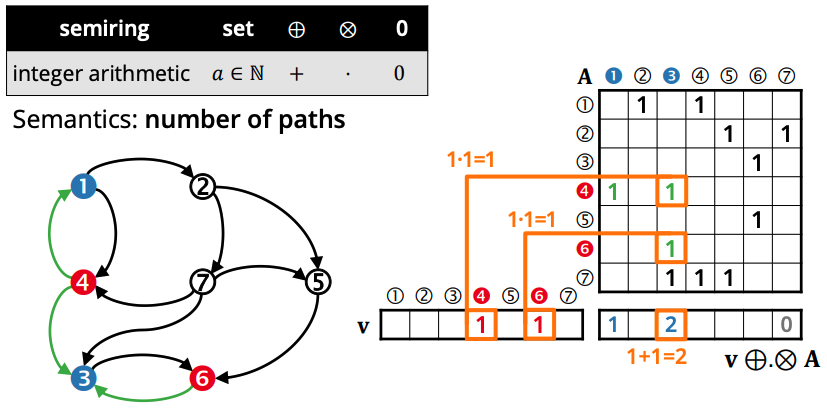

In [40]:
integerSemiring = mul(vector, matrix, Semirings.PLUS_TIMES)
print(integerSemiring)

7x1 GraphBLAS int64_t vector, bitmap by col
  2 entries, memory: 328 bytes

    (1,1)   1
    (3,1)   2


## Lor-Land Semiring

##### Tipically used to compute reachability from a node to another node


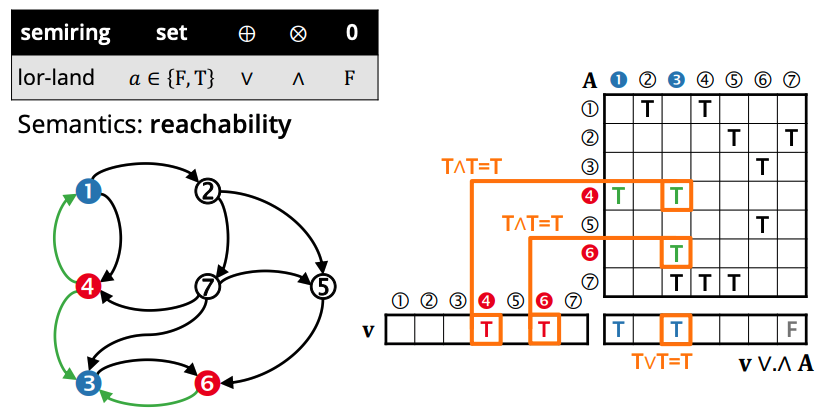

In [29]:
matrix =  GBMatrix(sparse([[false, false, false, true, false, false, false] [true, false, false, false, false, false, false] [false, false, false, true, false, true, true] [true, false, false, false, false, false, true] [false, true, false, false, false, false, true] [false, false, true, false, true, false, false] [false, true, false, false, false, false, false]]))
vector = GBVector(sparse([false, false, false, true, false, true, false]))

lorlandSemiring = mul(vector, matrix, Semirings.LOR_LAND)

print(lorlandSemiring)

7x1 GraphBLAS bool vector, bitmap by col
  2 entries, memory: 272 bytes

    (1,1)   1
    (3,1)   1


## Real Arithmetic Semiring

##### Tipically used to compute the strength of all paths

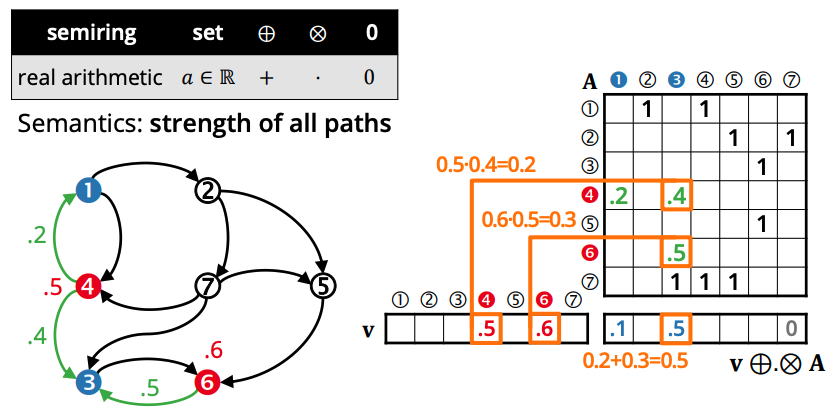

In [43]:
matrix =  GBMatrix(sparse([[0, 0, 0, 0.2, 0, 0, 0] [1, 0, 0, 0, 0, 0, 0] [0, 0, 0, 0.4, 0, 0.5, 1] [1, 0, 0, 0, 0, 0, 1] [0, 1, 0, 0, 0, 0, 1] [0, 0, 1, 0, 1, 0, 0] [0, 1, 0, 0, 0, 0, 0]]))
vector = GBVector(sparse([0, 0, 0, 0.5, 0, 0.6, 0]))

realArithmetic = mul(vector, matrix, Semirings.PLUS_TIMES)

print(realArithmetic)

7x1 GraphBLAS double vector, bitmap by col
  2 entries, memory: 328 bytes

    (1,1)    0.1
    (3,1)    0.5


## Min Plus Semiring

##### Tipically used to find the shortest path

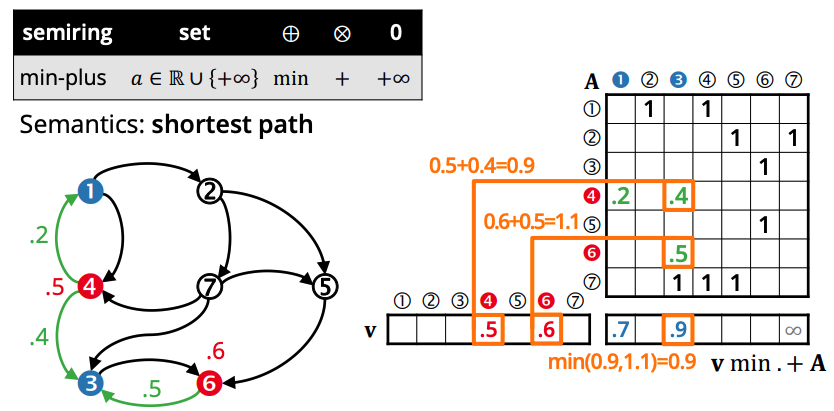

In [44]:
minplusSemiring = mul(vector, matrix, Semirings.MIN_PLUS)

print(minplusSemiring)

7x1 GraphBLAS double vector, bitmap by col
  2 entries, memory: 328 bytes

    (1,1)    0.7
    (3,1)    0.9


## Max Plus Semiring

##### Tipically used to compute matching

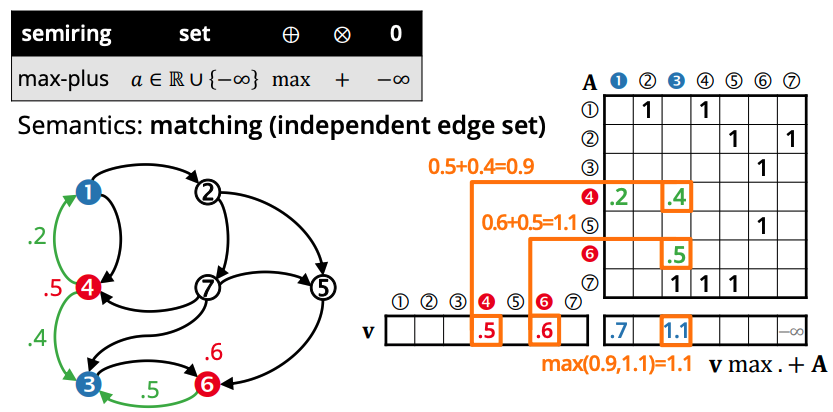

In [45]:
maxplusSemiring = mul(vector, matrix, Semirings.MAX_PLUS)

print(maxplusSemiring)

7x1 GraphBLAS double vector, bitmap by col
  2 entries, memory: 328 bytes

    (1,1)    0.7
    (3,1)    1.1


## Min Times Semiring

##### Tipically used to compute shortest product of connections

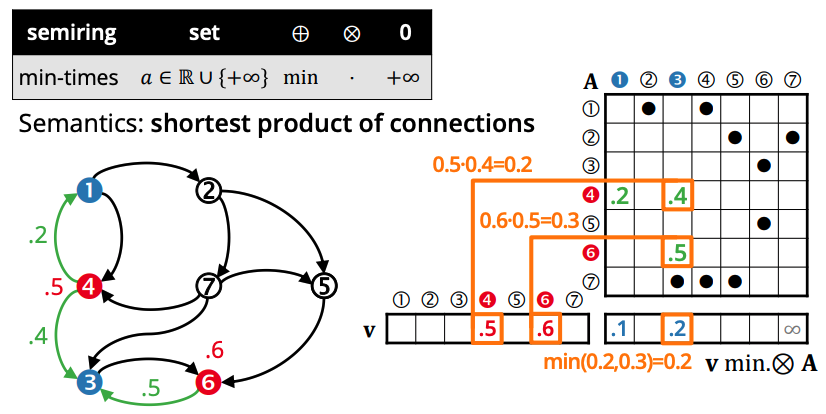

In [47]:
mintimesSemiring = mul(vector, matrix, Semirings.MIN_TIMES)

print(mintimesSemiring)

7x1 GraphBLAS double vector, bitmap by col
  2 entries, memory: 328 bytes

    (1,1)    0.1
    (3,1)    0.2


## Max Min Semiring

##### Tipically used to compute the longest of all connections

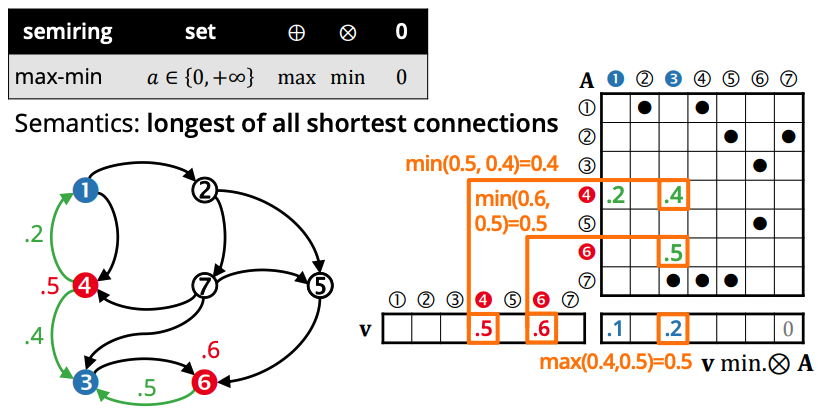

In [51]:
maxminSemiring = mul(vector, matrix, Semirings.MAX_MIN)

print(maxminSemiring)

7x1 GraphBLAS double vector, bitmap by col
  2 entries, memory: 328 bytes

    (1,1)    0.2
    (3,1)    0.5


## Element Wise Multiplication

##### Intersect operation between two matrix

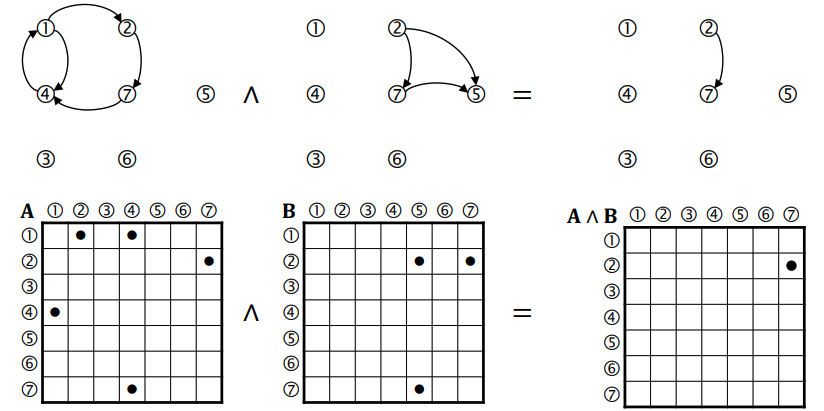

In [68]:
A = GBMatrix(sparse([[0, 0, 0, 1, 0, 0, 0] [1, 0, 0, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0] [1, 0, 0, 0, 0, 0, 1] [0, 0, 0, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0] [0, 1, 0, 0, 0, 0, 0]]))
B = GBMatrix(sparse([[0, 0, 0, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0] [0, 1, 0, 0, 0, 0, 1] [0, 0, 0, 0, 0, 0, 0] [0, 1, 0, 0, 0, 0, 0]]))

result = emul(A, B, BinaryOps.LOR)
print(result)

[nothing nothing nothing nothing nothing nothing nothing; nothing nothing nothing nothing nothing nothing 1; nothing nothing nothing nothing nothing nothing nothing; nothing nothing nothing nothing nothing nothing nothing; nothing nothing nothing nothing nothing nothing nothing; nothing nothing nothing nothing nothing nothing nothing; nothing nothing nothing nothing nothing nothing nothing]

## Element Wise Addition

##### Union operation between two matrix

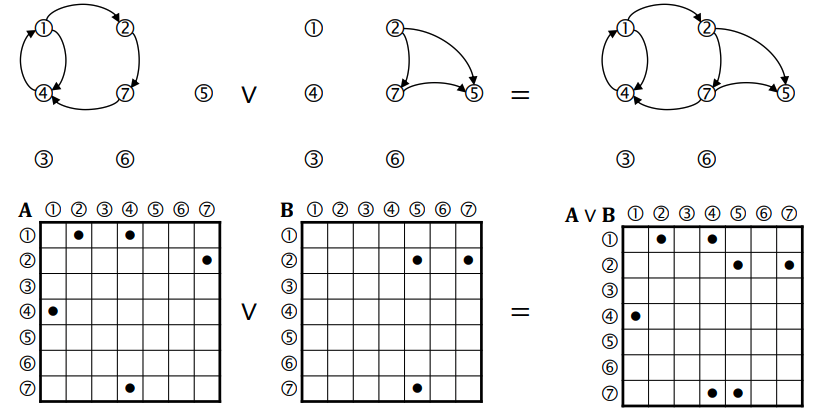

In [70]:
A = GBMatrix(sparse([[0, 0, 0, 1, 0, 0, 0] [1, 0, 0, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0] [1, 0, 0, 0, 0, 0, 1] [0, 0, 0, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0] [0, 1, 0, 0, 0, 0, 0]]))
B = GBMatrix(sparse([[0, 0, 0, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0] [0, 1, 0, 0, 0, 0, 1] [0, 0, 0, 0, 0, 0, 0] [0, 1, 0, 0, 0, 0, 0]]))

result = eadd(A, B, BinaryOps.LAND)
print(result)

[nothing 1 nothing 1 nothing nothing nothing; nothing nothing nothing nothing 1 nothing 1; nothing nothing nothing nothing nothing nothing nothing; 1 nothing nothing nothing nothing nothing nothing; nothing nothing nothing nothing nothing nothing nothing; nothing nothing nothing nothing nothing nothing nothing; nothing nothing nothing 1 1 nothing nothing]

## Turning a Graph Into Undirected Graph

##### And operation between two matrices

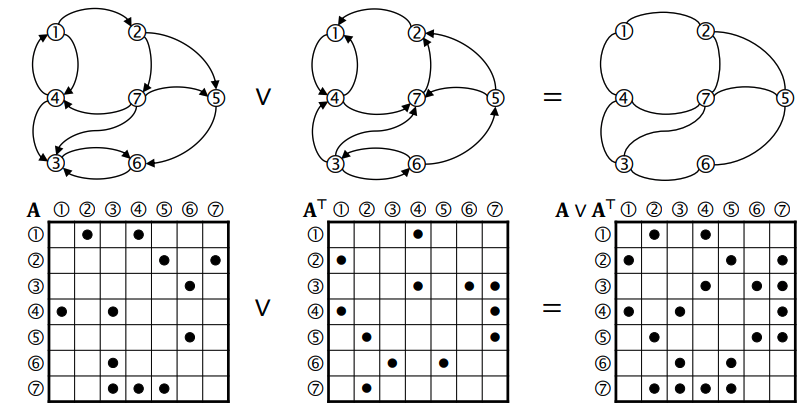

In [71]:
matrix =  GBMatrix(sparse([[0, 0, 0, 1, 0, 0, 0] [1, 0, 0, 0, 0, 0, 0] [0, 0, 0, 1, 0, 1, 1] [1, 0, 0, 0, 0, 0, 1] [0, 1, 0, 0, 0, 0, 1] [0, 0, 1, 0, 1, 0, 0] [0, 1, 0, 0, 0, 0, 0]]))

result = eadd(matrix, matrix', BinaryOps.LAND)
print(result)

[nothing 1 nothing 1 nothing nothing nothing; 1 nothing nothing nothing 1 nothing 1; nothing nothing nothing 1 nothing 1 1; 1 nothing 1 nothing nothing nothing 1; nothing 1 nothing nothing nothing 1 1; nothing nothing 1 nothing 1 nothing nothing; nothing 1 1 1 1 nothing nothing]

## Transpose Operation

##### Used to compute the transposed matrix 

In [72]:
result = matrix' # ' symbol used to transpose the matrix

print(matrix)
print("\n\n")
print(result)

[nothing 1 nothing 1 nothing nothing nothing; nothing nothing nothing nothing 1 nothing 1; nothing nothing nothing nothing nothing 1 nothing; 1 nothing 1 nothing nothing nothing nothing; nothing nothing nothing nothing nothing 1 nothing; nothing nothing 1 nothing nothing nothing nothing; nothing nothing 1 1 1 nothing nothing]

[nothing nothing nothing 1 nothing nothing nothing; 1 nothing nothing nothing nothing nothing nothing; nothing nothing nothing 1 nothing 1 1; 1 nothing nothing nothing nothing nothing 1; nothing 1 nothing nothing nothing nothing 1; nothing nothing 1 nothing 1 nothing nothing; nothing 1 nothing nothing nothing nothing nothing]

## Selection Operation

##### Used to select part of the matrices. 
##### NB**** you can assign the selected elements to variables to use them in other computations

In [82]:
print("COLUMN SELECTION\n\n")
print(matrix[:,5])
print("\n\n")
print("ROW SELECTION\n\n")
print(matrix[5,:])
print("\n\n")
print("COMBINED ROW AND COLUMN SELECTION\n\n")
print(matrix[begin:5, 3:5]) #takes 5 rows and column 3 - 4 - 5

COLUMN SELECTION

[nothing; 1; nothing; nothing; nothing; nothing; 1]

ROW SELECTION

[nothing nothing nothing nothing nothing 1 nothing]

COMBINED ROW AND COLUMN SELECTION

[nothing 1 nothing; nothing nothing 1; nothing nothing nothing; 1 nothing nothing; nothing nothing nothing]

## Masking

##### Used to protect not-needed computations -> speeds up the computation


In [94]:
matrix =  GBMatrix(sparse([[0, 0, 0, 1, 0, 0, 0] [1, 0, 0, 0, 0, 0, 0] [0, 0, 0, 1, 0, 1, 1] [1, 0, 0, 0, 0, 0, 1] [0, 1, 0, 0, 0, 0, 1] [0, 0, 1, 0, 1, 0, 0] [0, 1, 0, 0, 0, 0, 0]]))
vector = GBVector(sparse([0, 0, 0, 1, 0, 1, 0]))
maskvector = GBVector(sparse([1, 0, 0, 0, 0, 0, 1]))
print(mul(vector, matrix, Semirings.PLUS_TIMES))
print("\n\n")

7x1 GraphBLAS int64_t vector, bitmap by col
  2 entries, memory: 328 bytes

    (1,1)   1
    (3,1)   2




##### Complemented Mask: The mask vector only allow the intersection values to be displayed in the result. the mask vector will be complemented before being used in the computation
##### NB* example of complemented vector [0, 1, 1, 0] -> [1, 0, 0, 1]

In [95]:
integerSemiring = mul(vector, matrix, Semirings.PLUS_TIMES, mask=maskvector, desc=Descriptors.C)
print(integerSemiring)

7x1 GraphBLAS int64_t vector, bitmap by col
  1 entry, memory: 328 bytes

    (3,1)   2


##### Structural Mask: The mask vector only allow the intersection values to be displayed in the result

In [96]:
integerSemiring = mul(vector, matrix, Semirings.PLUS_TIMES, mask=maskvector, desc=Descriptors.S)
print(integerSemiring)

7x1 GraphBLAS int64_t vector, bitmap by col
  1 entry, memory: 328 bytes

    (1,1)   1
